# Exploratory Data analysis

### Step 1 : Importing all the required libraries

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, StandardScaler
from sklearn.metrics import fbeta_score,accuracy_score, make_scorer,roc_curve, roc_auc_score ,r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import OrderedDict
from datetime import datetime, date
# magic word for producing visualizations in notebook
warnings.filterwarnings('ignore')
%matplotlib inline

### Explanation of the columns present in the dataset

We have included publically avaliable dataset [Covid 19 Dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset) provided by Kaggle to the data science community. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" while 2 means "no" and values as 97 and 99 are missing data. 

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

### Step 2 : Exploratory Data Analysis

In [2]:
#Reading the input file
df  = pd.read_csv("Covid.csv")

In [3]:
pd.set_option('display.max_columns', 22)
display(df.head(10))

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

- We can see above all the columns are of int64 datatype except 'DATE_DIED' which is object datatype. Now let us format the DATE_DIED into more readable format.

In [5]:
# We will replace 9999-99-99 to some future date and convert DATE_DIED to datetime datatype
df['DATE_DIED'] = df['DATE_DIED'].replace('9999-99-99','10/10/2031')
df['DATE_DIED']  = pd.to_datetime(df['DATE_DIED'], format="%d/%m/%Y")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USMER                 1048575 non-null  int64         
 1   MEDICAL_UNIT          1048575 non-null  int64         
 2   SEX                   1048575 non-null  int64         
 3   PATIENT_TYPE          1048575 non-null  int64         
 4   DATE_DIED             1048575 non-null  datetime64[ns]
 5   INTUBED               1048575 non-null  int64         
 6   PNEUMONIA             1048575 non-null  int64         
 7   AGE                   1048575 non-null  int64         
 8   PREGNANT              1048575 non-null  int64         
 9   DIABETES              1048575 non-null  int64         
 10  COPD                  1048575 non-null  int64         
 11  ASTHMA                1048575 non-null  int64         
 12  INMSUPR               1048575 non-null  in

In [31]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,GENDER
0,2,1,1,2020-05-03,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,Expired,Female
1,2,1,1,2020-06-03,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,Expired,Male
2,2,1,2,2020-06-09,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,Expired,Male
3,2,1,1,2020-06-12,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,Expired,Female
4,2,1,1,2020-06-21,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,Expired,Male


In [8]:
#Checking if there are any missing values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [9]:
#Checking for all unique values in all the columns
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [10]:
# We will create a new column DIED which will tell if the patient is dead or alive
today = date.today()
df['DIED'] = ['Expired' if i <= today else 'Alive' for i in df['DATE_DIED'] ]
#Changing SEX column type to String
df['SEX'] = df['SEX'].astype(str)

In [11]:
# Now creating new column GENDER which will have more distinct values for SEX which is MALE or FEMALE
df['GENDER'] = ['Female' if i == '1' else 'Male' for i in df['SEX']]
df.drop(['SEX'], axis = 1, inplace=True )

In [45]:
df_grouped = df.groupby('GENDER')
df_grouped.count()['DIED']

GENDER
Female    525064
Male      523511
Name: DIED, dtype: int64

- We can see above, the count of males and females are almost same in dataset

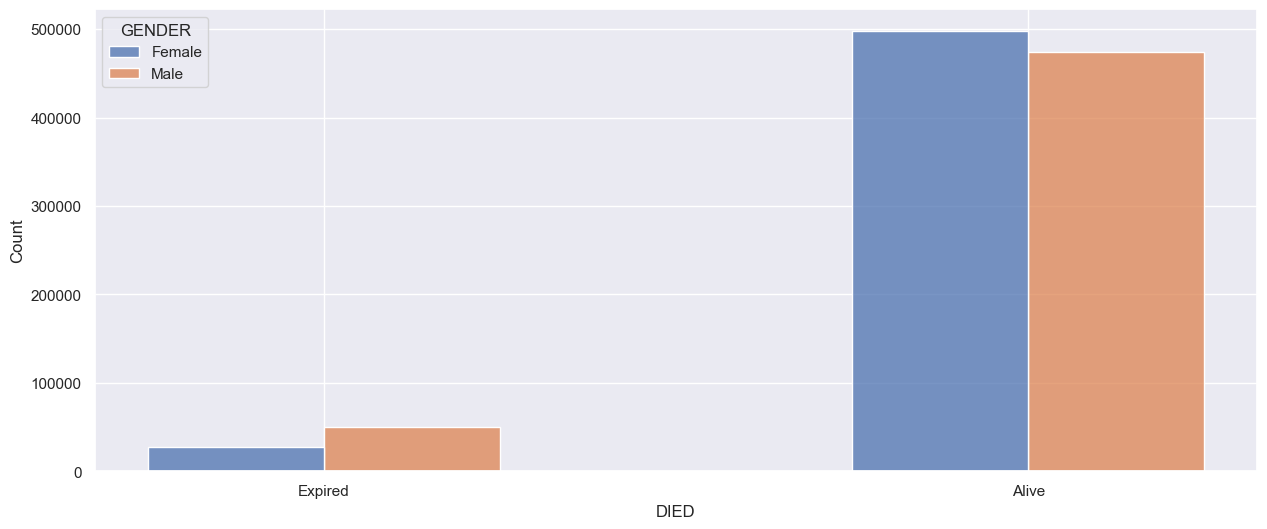

In [12]:
# Let us check what percentage of people who died and are alive are males and females
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
ax = sns.histplot(x="DIED", data=df, hue="GENDER", multiple="dodge", shrink= 0.5)

- In the Graph above we can see there are more males that died then females.So lets look all people who died a little closely

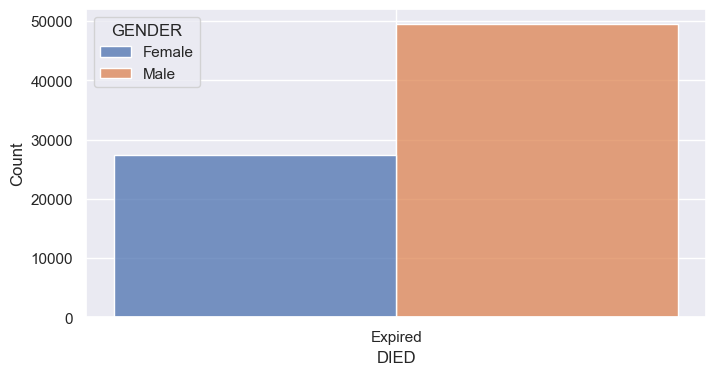

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,4))
ax = sns.histplot(x="DIED", data=df[df['DIED'] == 'Expired'], hue="GENDER", multiple="dodge", shrink= 0.5)

- From the graph above we can see **Count of males who died were almost double the count of females who died**

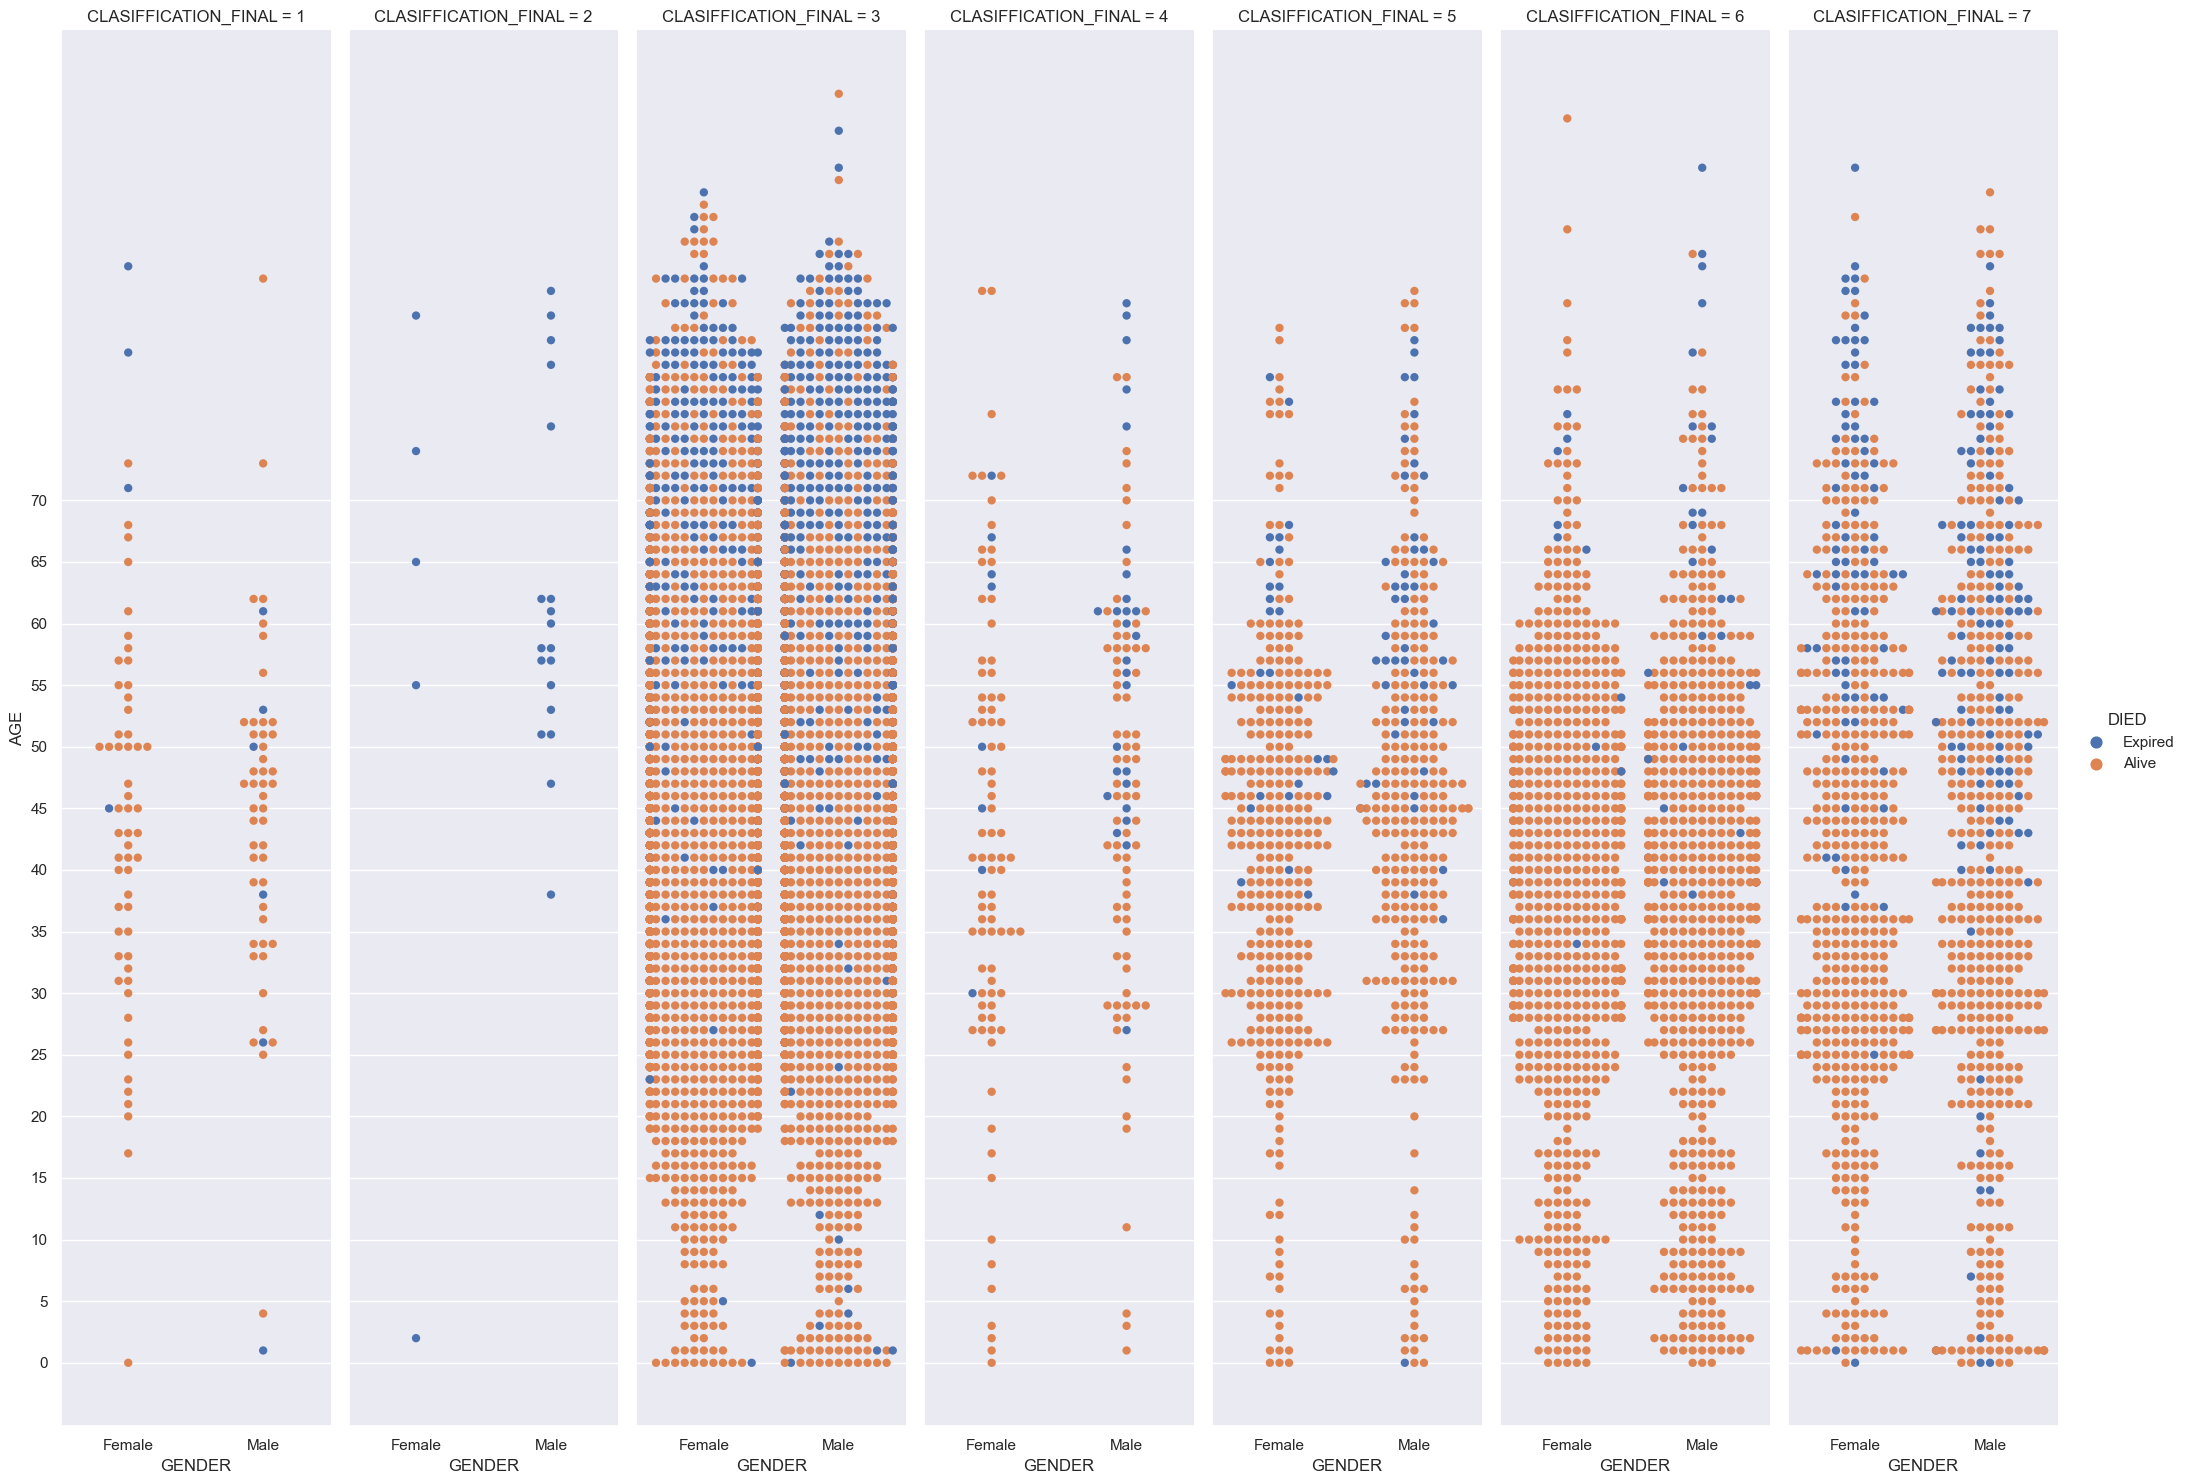

In [82]:
# Now let is check relation between Classification, Gender, Age and Count of people died.
sns.factorplot(data=df[:12000], 
               col='CLASIFFICATION_FINAL', 
               x='GENDER', 
               y='AGE', 
               hue='DIED', 
               kind='swarm', size=15, aspect=0.20, s=6)
plt.yticks(np.arange(0,75,5));

 - We create a Factor plot for first 6000 entries in dataset and we can notice a few things
 
     - Most of the people were found to be in Covid degree of 3
     
     - Everyone with Covid degree of 2 died
     
     - Most of the people with Covid degree 3 with Age above 65 had very high probability of death.
     
     - People from Age 20 to 35 had a very low probability of death with any degree of covid 
     
     - Most people with Covid Degree 1 survived

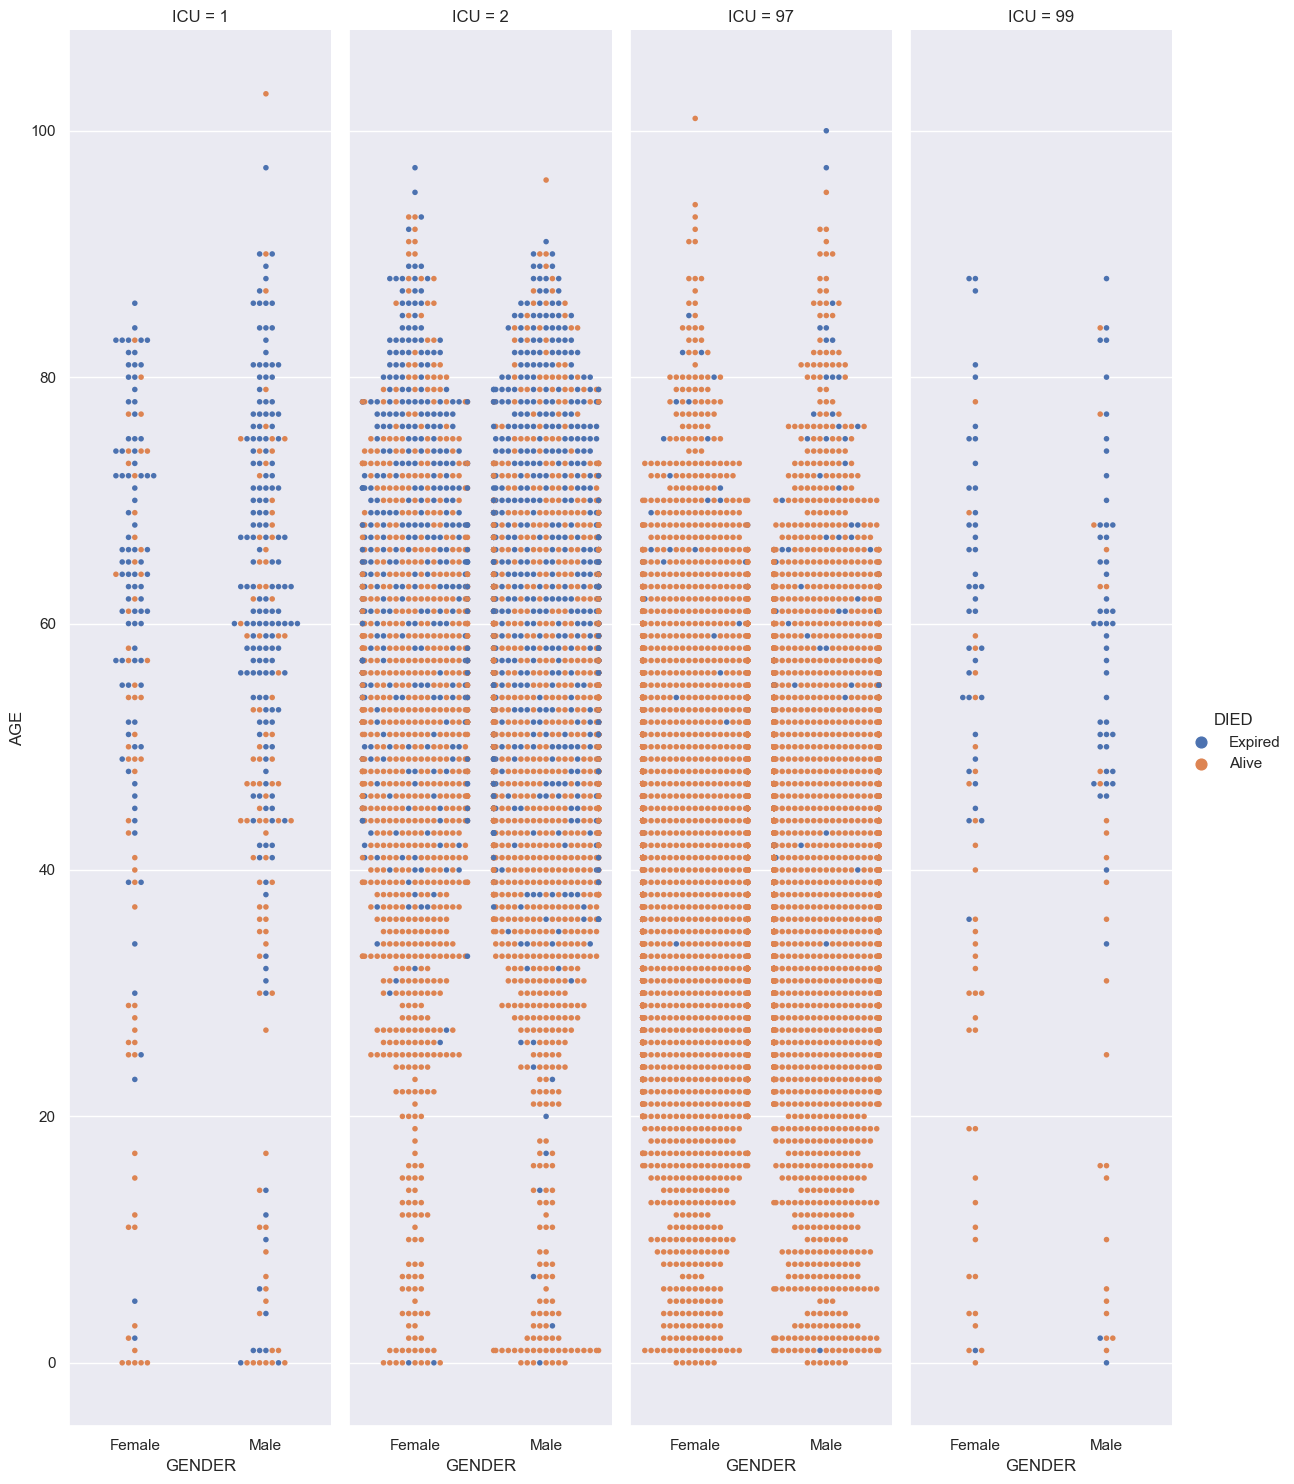

In [77]:
# Now let is check relation between ICU,Gender, Age and Count of people died.
sns.factorplot(data=df[:12000], 
               col='ICU', 
               x='GENDER', 
               y='AGE', 
               hue='DIED', 
               kind='swarm', size=15, aspect=0.20, s=4)

- We create a Factor plot for first 6000 entries in dataset and we can notice a few things
    
    - Most people who were submitted to ICU died
    
    - People of age over and above 60 and not admitted to ICU had very high probability of death
    
    - Most women between the age 0 to 20 if admitted to ICU survived

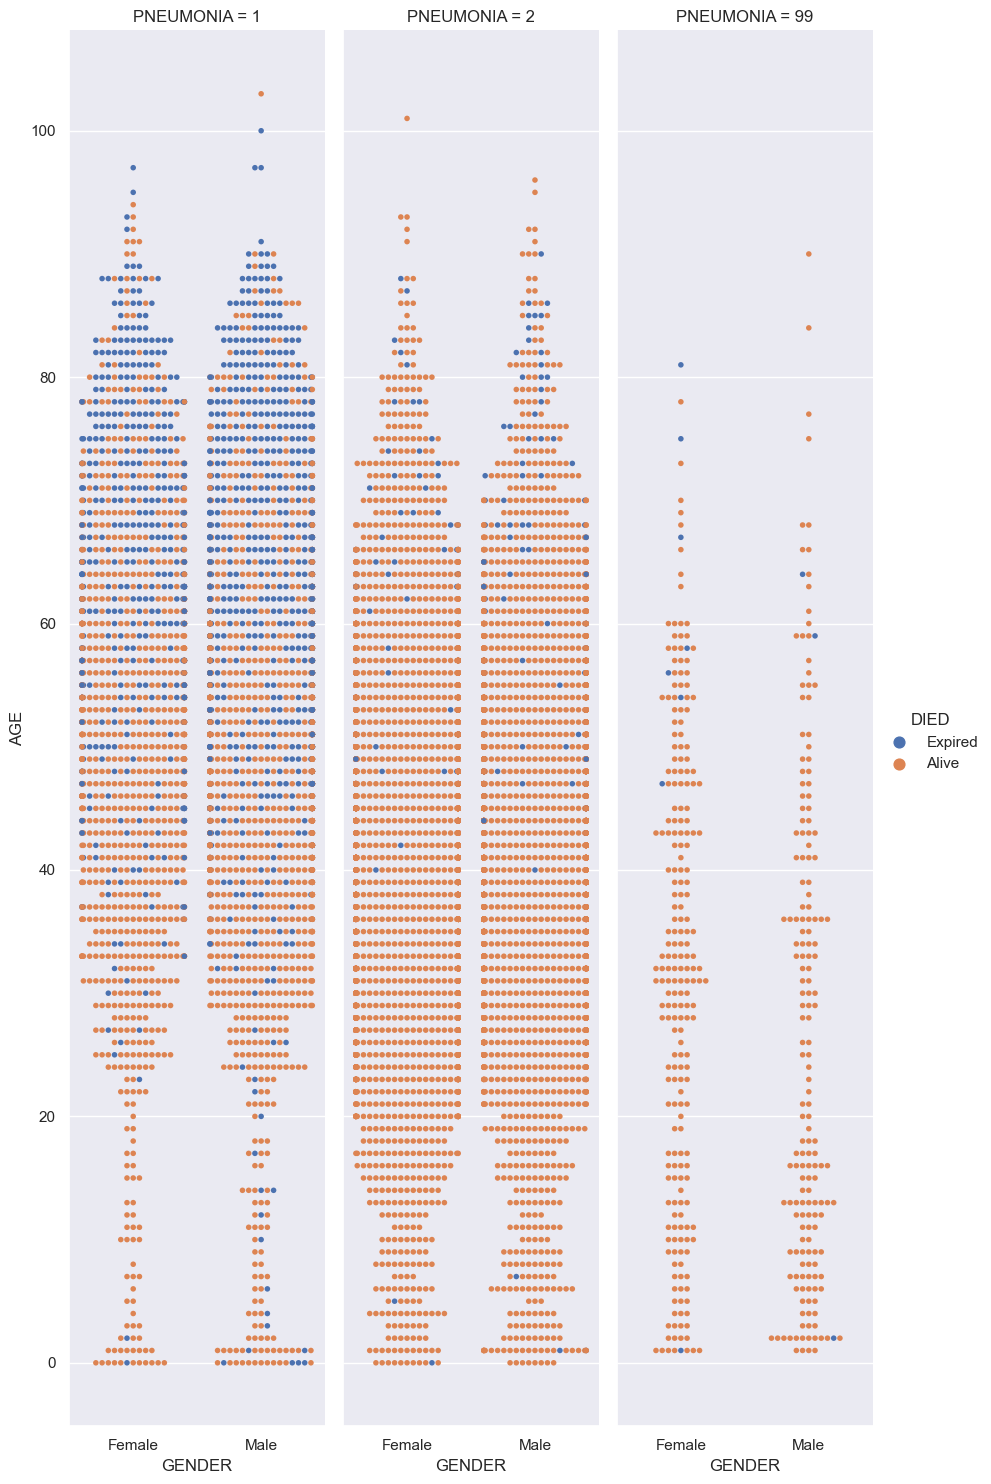

In [76]:
# Now let is check relation between Pneumonia,Gender, Age and Count of people died.
sns.factorplot(data=df[:12000], 
               col='PNEUMONIA', 
               x='GENDER', 
               y='AGE', 
               hue='DIED', 
               kind='swarm', size=15, aspect=0.20, s=4)

- We create a Factor plot for first 6000 entries in dataset and we can notice a few things
    
    - Most Males and Females above the age 60 and suffering from Pneumonia had high probability of death
    
    - Possibly COVID lead to Pneumonia as most of the people without Pneumonia lived 

<Figure size 2500x1000 with 0 Axes>

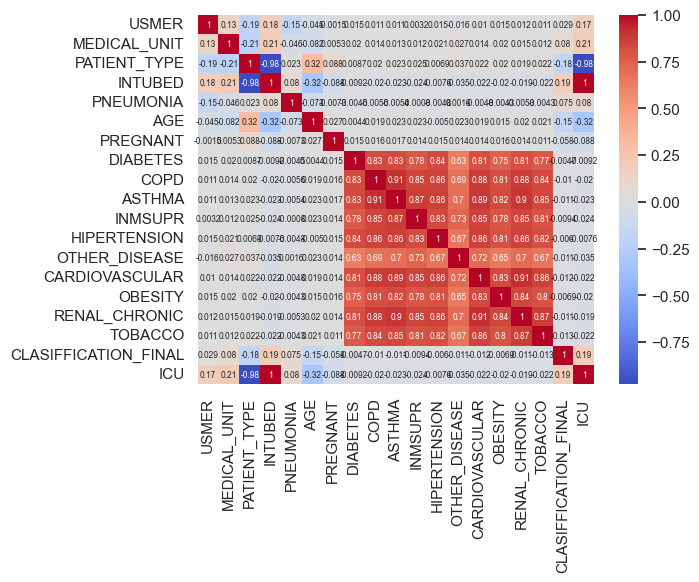

<Figure size 2500x1000 with 0 Axes>

In [17]:
# Now let us try to create Heatmap for the columns present in the dataset
sns.heatmap(data=df.corr(),annot=True, annot_kws={"size":6}, cmap='coolwarm')
plt.figure(figsize=(25, 10))

- From the heatmap above we can see there are many positive and negative correlations. 
- Also there are highly corelated columns like ICU and Intubed. 

<AxesSubplot:xlabel='DIED', ylabel='AGE'>

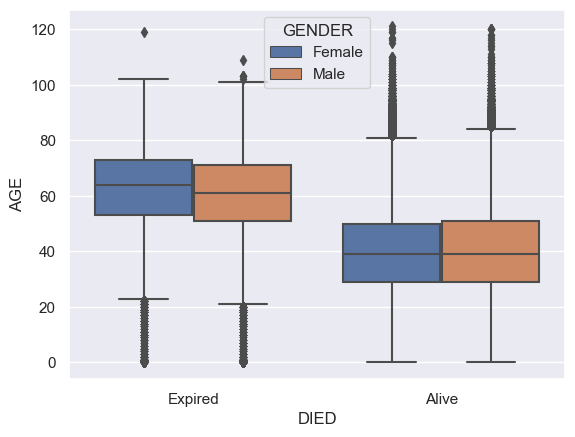

In [18]:
sns.boxplot(data=df, y = 'AGE', x= 'DIED' , hue='GENDER')

- From the chart above we can see
    
    - Average age of males who died was a little lower then Average age of females who died
    
    - Younger people had higher probability of surviving

### Step 3 : Preprocessing the data

In [19]:
# Scaling AGE as it is the only numerical column in the dataset
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled['AGE'] = scaler.fit_transform(df['AGE'].values.reshape(-1,1))
df_scaled

,USMER,MEDICAL_UNIT,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,GENDER
0,2,1,1,2020-05-03,97,1,0.537190,2,2,2,2,2,1,2,2,2,2,2,3,97,Expired,Female
1,2,1,1,2020-06-03,97,1,0.595041,97,2,2,2,2,1,2,2,1,1,2,5,97,Expired,Male
2,2,1,2,2020-06-09,1,2,0.454545,97,1,2,2,2,2,2,2,2,2,2,3,2,Expired,Male
3,2,1,1,2020-06-12,97,2,0.438017,2,2,2,2,2,2,2,2,2,2,2,7,97,Expired,Female
4,2,1,1,2020-06-21,97,2,0.561983,97,1,2,2,2,1,2,2,2,2,2,3,97,Expired,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,2031-10-10,97,2,0.330579,97,2,2,2,2,2,2,2,2,2,2,7,97,Alive,Male
1048571,1,13,2,2031-10-10,2,2,0.421488,97,2,2,2,2,1,2,2,2,2,2,7,2,Alive,Male
1048572,2,13,1,2031-10-10,97,2,0.454545,97,2,2,2,2,2,2,2,2,2,2,7,97,Alive,Male
1048573,2,13,1,2031-10-10,97,2,0.231405,97,2,2,2,2,2,2,2,2,2,2,7,97,Alive,Male


In [20]:
# Converting Data back to machine readable form
df_scaled['GENDER'] = [1 if i == 'Female' else 2 for i in df_scaled['GENDER']]
df_scaled['DIED'] = [1 if i == 'Expired' else 2 for i in df_scaled['DIED']]
df_scaled

,USMER,MEDICAL_UNIT,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,GENDER
0,2,1,1,2020-05-03,97,1,0.537190,2,2,2,2,2,1,2,2,2,2,2,3,97,1,1
1,2,1,1,2020-06-03,97,1,0.595041,97,2,2,2,2,1,2,2,1,1,2,5,97,1,2
2,2,1,2,2020-06-09,1,2,0.454545,97,1,2,2,2,2,2,2,2,2,2,3,2,1,2
3,2,1,1,2020-06-12,97,2,0.438017,2,2,2,2,2,2,2,2,2,2,2,7,97,1,1
4,2,1,1,2020-06-21,97,2,0.561983,97,1,2,2,2,1,2,2,2,2,2,3,97,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,2031-10-10,97,2,0.330579,97,2,2,2,2,2,2,2,2,2,2,7,97,2,2
1048571,1,13,2,2031-10-10,2,2,0.421488,97,2,2,2,2,1,2,2,2,2,2,7,2,2,2
1048572,2,13,1,2031-10-10,97,2,0.454545,97,2,2,2,2,2,2,2,2,2,2,7,97,2,2
1048573,2,13,1,2031-10-10,97,2,0.231405,97,2,2,2,2,2,2,2,2,2,2,7,97,2,2


In [21]:
df_scaled.columns

Index(['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED',
       'GENDER'],
      dtype='object')

In [22]:
# Copying the target variable
label = df_scaled['DIED']
label

0          1
1          1
2          1
3          1
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: DIED, Length: 1048575, dtype: int64

In [23]:
# Dropping DIED and DATE_DIED columns from main dataset as date of death is irrelavent and DIED is target column
df_scaled.drop(['DIED','DATE_DIED'], axis = 1 , inplace = True)
df_scaled

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,GENDER
0,2,1,1,97,1,0.537190,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,1,97,1,0.595041,97,2,2,2,2,1,2,2,1,1,2,5,97,2
2,2,1,2,1,2,0.454545,97,1,2,2,2,2,2,2,2,2,2,3,2,2
3,2,1,1,97,2,0.438017,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,1,97,2,0.561983,97,1,2,2,2,1,2,2,2,2,2,3,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,97,2,0.330579,97,2,2,2,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,2,0.421488,97,2,2,2,2,1,2,2,2,2,2,7,2,2
1048572,2,13,1,97,2,0.454545,97,2,2,2,2,2,2,2,2,2,2,7,97,2
1048573,2,13,1,97,2,0.231405,97,2,2,2,2,2,2,2,2,2,2,7,97,2


In [24]:
# Performing One hot encoding for all the columns
df_final = pd.get_dummies(df_scaled, columns = ['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'INTUBED','PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'GENDER' ])

### Step 5 : Shuffle and Split Dataset

In [25]:
# Preparing the data for Model training
X_train, X_test, y_train, y_test = train_test_split(df_final, 
                                                    label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

### Step 6 : Model Training

In [26]:
# Testing Logistic Regression
Logistic_regression_clf = LogisticRegression()

Logistic_regression_model = Logistic_regression_clf.fit(X_train, y_train)

Logistic_regression_pred = Logistic_regression_model.predict(X_test)

Logistic_regression_proba = Logistic_regression_model.predict_proba(X_test)

Logistic_regression_accuracy = accuracy_score(y_test, Logistic_regression_pred)

Logistic_regression_accuracy

0.9500417232911332

In [27]:
# Testing Random Forest
Randon_forest_clf = RandomForestClassifier()

# Fit the Classifier object on Input data
Random_forest_model = Randon_forest_clf.fit(X_train, y_train)

# Predict the Values on test data
Randon_forest_pred = Random_forest_model.predict(X_test)

# Calculate the Probalities for each Prediction
Randon_forest_proba = Random_forest_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
Random_forest_accuracy = accuracy_score(y_test, Randon_forest_pred) 

Random_forest_accuracy

0.9432610924349712

In [28]:
# Testing Gaussian Naive Bayes
nb_clf = GaussianNB()

nb_model = nb_clf.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_proba = nb_model.predict_proba(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred)

nb_accuracy

0.8995875354647974

### Step 7 : Hyperparameter Tuning

- From the above section we can see Random forrest and Logistic regression have better Accuary therefore we will perform Hyperparameter tuning using Grid Search CV to find the best Parameters to get the output

In [29]:
clf = Logistic_regression_clf
parameters = {"C" : [0.01,0.1, 1,10,100], 
              "penalty" : ['l1', 'l2'], 
              "class_weight":['balanced'],
              "solver": ['liblinear']}
scorer=make_scorer(fbeta_score, beta=2)
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
#predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, Logistic_regression_pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, Logistic_regression_pred, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

print("\n The best estimator across ALL searched params:\n",grid_obj.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_obj.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_obj.best_params_)

Unoptimized model
------
Accuracy score on testing data: 0.9500
F-score on testing data: 0.5545

Optimized Model
------
Final accuracy score on the testing data: 0.9006
Final F-score on the testing data: 0.7415

 The best estimator across ALL searched params:
 LogisticRegression(C=100, class_weight='balanced', penalty='l1',
                   solver='liblinear')

 The best score across ALL searched params:
 0.7429769940033217

 The best parameters across ALL searched params:
 {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [30]:
clf = Randon_forest_clf
parameters = {"max_depth" : [1,10,100], 
              "min_samples_split" : [6, 8, 10, 12], 
              "min_samples_leaf" : [3,4,5]}
scorer=make_scorer(fbeta_score, beta=2)
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
#predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, Randon_forest_pred)))
print("Fbeta-score on testing data: {:.4f}".format(fbeta_score(y_test, Randon_forest_pred, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final Fbeta-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

print("\n The best estimator across ALL searched params:\n",grid_obj.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_obj.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_obj.best_params_)

Unoptimized model
------
Accuracy score on testing data: 0.9433
Fbeta-score on testing data: 0.5536

Optimized Model
------
Final accuracy score on the testing data: 0.9515
Final Fbeta-score on the testing data: 0.5495

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=12)

 The best score across ALL searched params:
 0.548349827010895

 The best parameters across ALL searched params:
 {'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 12}
